# Analisi performance classificatore Ada Boost

In [1]:
# Import dei pacchetti che mi servono nell'analisi
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Caricamento dei risultati ottenuti nel codice "AdaBoost.py"
risultati = np.load("Results/AdaBoost.npz", allow_pickle = True)

In [3]:
# Stampo quali sono le keys per averle sott'occhio
for k in risultati.keys():
    print(k)

globConfusionMatrix
globAccuracy
globPrecision
globRecall
globF1
globxROC
globyROC
globAUC
globConfusionMatrixErr
globAccuracyErr
globPrecisionErr
globRecallErr
globF1Err
globxROCErr
globyROCErr
globAUCErr
iperParam_n_estimators
iperParam_learning_rate
iperParam_algorithm


---

### Verifico quale iterazione ha ottenuto il miglior risultato degli Scoring

In [4]:
print(f"Il valore massimo della Accuracy è stato {np.max(risultati['globAccuracy'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAccuracy']):d}")
print(f"Il valore massimo della Precision è stato {np.max(risultati['globPrecision'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globPrecision']):d}")
print(f"Il valore massimo della Recall è stato {np.max(risultati['globRecall'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globRecall']):d}")
print(f"Il valore massimo della F1 è stato {np.max(risultati['globF1'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globF1']):d}")
print(f"Il valore massimo della AUC è stato {np.max(risultati['globAUC'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAUC']):d}")

Il valore massimo della Accuracy è stato 57.59 % ed è stato ottenuto all'iterazione 26
Il valore massimo della Precision è stato 55.86 % ed è stato ottenuto all'iterazione 5
Il valore massimo della Recall è stato 99.99 % ed è stato ottenuto all'iterazione 46
Il valore massimo della F1 è stato 63.30 % ed è stato ottenuto all'iterazione 46
Il valore massimo della AUC è stato 60.23 % ed è stato ottenuto all'iterazione 26


In [5]:
# Visto che ci sono 3 indici di iterazioni nelle quali gli scoring sono risultati i migliori, vedo ogni scoring se varia di molto tra di esse
iter_1 = 26
iter_2 = 5
iter_3 = 46

print(f"\t\t Iterazione {iter_1} \t\tIterazione {iter_2} \t\tIterazione {iter_3}" )
print(f"Accuracy:\t {risultati['globAccuracy'][iter_1]*100:.2f} ± {risultati['globAccuracyErr'][iter_1]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_2]*100:.2f} ± {risultati['globAccuracyErr'][iter_2]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_3]*100:.2f} ± {risultati['globAccuracyErr'][iter_3]*100:.2f} % ")
print(f"Precision:\t {risultati['globPrecision'][iter_1]*100:.2f} ± {risultati['globPrecisionErr'][iter_1]*100:.2f} % \
       \t{risultati['globPrecision'][iter_2]*100:.2f} ± {risultati['globPrecisionErr'][iter_2]*100:.2f} % \
       \t{risultati['globPrecision'][iter_3]*100:.2f} ± {risultati['globPrecisionErr'][iter_3]*100:.2f} % ")
print(f"Recall:\t\t {risultati['globRecall'][iter_1]*100:.2f} ± {risultati['globRecallErr'][iter_1]*100:.2f} % \
       \t{risultati['globRecall'][iter_2]*100:.2f} ± {risultati['globRecallErr'][iter_2]*100:.2f} % \
       \t{risultati['globRecall'][iter_3]*100:.2f} ± {risultati['globRecallErr'][iter_3]*100:.2f} % ")
print(f"F1:\t\t {risultati['globF1'][iter_1]*100:.2f} ± {risultati['globF1Err'][iter_1]*100:.2f} % \
       \t{risultati['globF1'][iter_2]*100:.2f} ± {risultati['globF1Err'][iter_2]*100:.2f} % \
       \t{risultati['globF1'][iter_3]*100:.2f} ± {risultati['globF1Err'][iter_3]*100:.2f} % ")
print(f"AUC:\t\t {risultati['globAUC'][iter_1]*100:.2f} ± {risultati['globAUCErr'][iter_1]*100:.2f} % \
       \t{risultati['globAUC'][iter_2]*100:.2f} ± {risultati['globAUCErr'][iter_2]*100:.2f} % \
       \t{risultati['globAUC'][iter_3]*100:.2f} ± {risultati['globAUCErr'][iter_3]*100:.2f} % ")

		 Iterazione 26 		Iterazione 5 		Iterazione 46
Accuracy:	 57.59 ± 0.08 %        	54.73 ± 0.08 %        	46.31 ± 0.00 % 
Precision:	 55.43 ± 0.11 %        	55.86 ± 0.34 %        	46.31 ± 0.00 % 
Recall:		 43.01 ± 0.14 %        	10.95 ± 0.98 %        	99.99 ± 0.00 % 
F1:		 48.43 ± 0.11 %        	18.11 ± 1.38 %        	63.30 ± 0.00 % 
AUC:		 60.23 ± 0.10 %        	57.70 ± 0.09 %        	46.40 ± 0.07 % 


Posso concludere che l'iterazione 26 è la migliore visto che nell'iterazione 5 ci sono gli scoring Recall e F1 molto bassi rispetto agli altri e nell'iterazione 46 i valori sono più bassi rispetto all'iterazione 26 e il valore di Recall così alto sembra un outlier

In [6]:
# Definisco quindi il miglior caso: l'iterazione 216
miglior_caso = 26

### Verifico qual era la configurazione dei parametri che ha ottenuto il miglior risultato degli Scoring

In [7]:
print(f"Il numero di weak learners: {risultati['iperParam_n_estimators'][miglior_caso]}")
print(f"Il learning rate era: {risultati['iperParam_learning_rate'][miglior_caso]}")
print(f"L'algoritmo di boosting era: {risultati['iperParam_algorithm'][miglior_caso]}")

Il numero di weak learners: 600
Il learning rate era: 0.1
L'algoritmo di boosting era: SAMME.R


---

### Disegno la ROC curve del miglior caso

In [12]:
%matplotlib inline

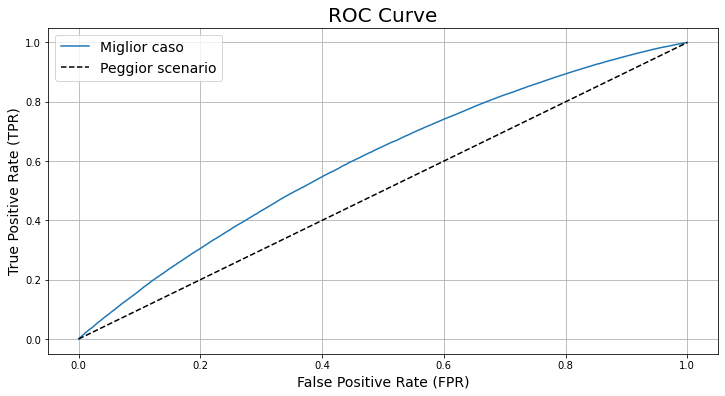

In [13]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("ROC Curve", fontsize = 20)

ax.plot(risultati['globxROC'][:,miglior_caso], risultati['globyROC'][:,miglior_caso], c = "tab:blue", label = "Miglior caso")
ax.plot((0, 1), (0, 1), c = 'k', ls = "--", label = "Peggior scenario")

ax.set_xlabel("False Positive Rate (FPR)", fontsize = 14)
ax.set_ylabel("True Positive Rate (TPR)", fontsize = 14)
ax.legend(fontsize = 14)
ax.grid()
plt.show()

---

### Disegno la Confusion Matrix

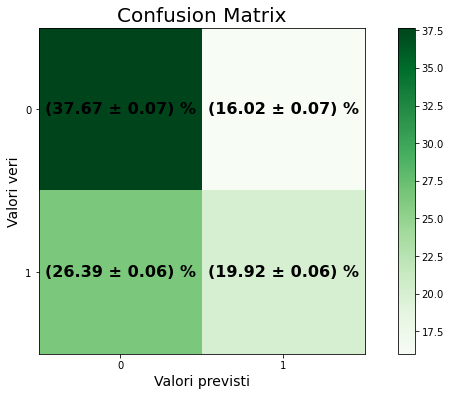

In [14]:
# Calcolo la Matrice di confusione e il suo relativo errore per il plot
ConfusionMat = risultati['globConfusionMatrix'][:,:,miglior_caso]
ConfusionMat_err = risultati['globConfusionMatrixErr'][:,:,miglior_caso]
ConfusionMat_tot = np.sum(ConfusionMat)
ConfusionMat_plot = ConfusionMat / ConfusionMat_tot * 100
ConfusionMat_plot_err = ConfusionMat_err / ConfusionMat_tot * 100


# Plotto la matrice
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Confusion Matrix", fontsize = 20)

im = ax.imshow(ConfusionMat_plot, cmap = "Greens", origin = "upper")
# Disegno la colorbar
fig.colorbar(im)

# Stampo i valori con gli errori
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, f"({ConfusionMat_plot[i, j]:.2f} ± {ConfusionMat_plot_err[i, j]:.2f}) %",
                       ha = "center", va = "center", color = "k", fontsize = 16, weight = "semibold")

# Setto gli assi tra 0 e 1
ax.set_xticks((0,1))
ax.set_yticks((0,1))
ax.set_xlabel("Valori previsti", fontsize = 14)
ax.set_ylabel("Valori veri", fontsize = 14)
plt.show()

---

### Valuto la dipendenza di un parametro rispetto agli scoring ottenuti

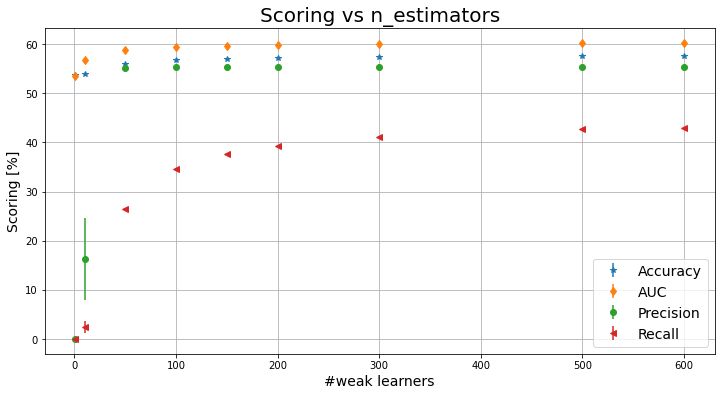

In [43]:
# Creo la condizione per trovare solamente il parametro iperParam_n_estimators
cond = ( (risultati["iperParam_learning_rate"] == risultati["iperParam_learning_rate"][miglior_caso]) &
         (risultati["iperParam_algorithm"] == risultati["iperParam_algorithm"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs n_estimators", fontsize = 20)

ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("#weak learners", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

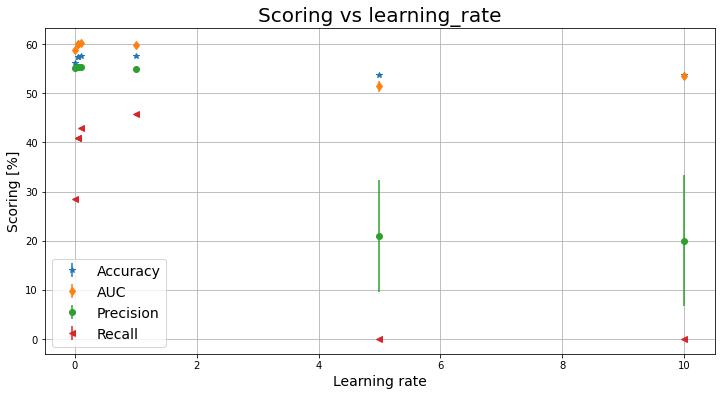

In [44]:
# Creo la condizione per trovare solamente il parametro iperParam_learning_rate
cond = ( (risultati["iperParam_n_estimators"] == risultati["iperParam_n_estimators"][miglior_caso]) &
         (risultati["iperParam_algorithm"] == risultati["iperParam_algorithm"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs learning_rate", fontsize = 20)

ax.errorbar(risultati["iperParam_learning_rate"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_learning_rate"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_learning_rate"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_learning_rate"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Learning rate", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

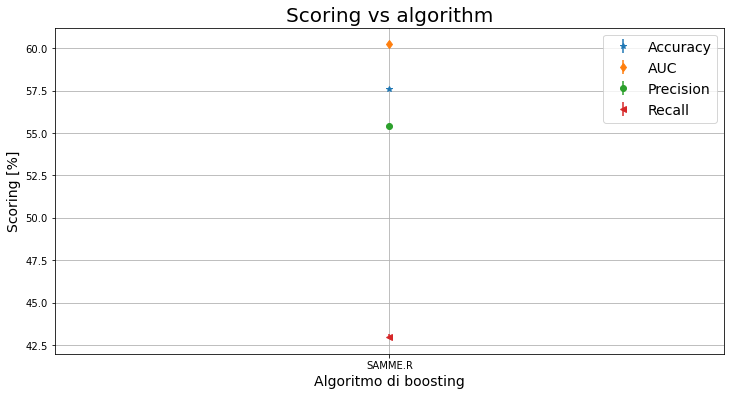

In [45]:
# Creo la condizione per trovare solamente il parametro iperParam_algorithm
cond = ( (risultati["iperParam_n_estimators"] == risultati["iperParam_n_estimators"][miglior_caso]) &
         (risultati["iperParam_learning_rate"] == risultati["iperParam_learning_rate"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs algorithm", fontsize = 20)

ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_algorithm"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Algoritmo di boosting", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

Visto che è un solo caso faccio una tabella con i valori e non esporto la figura